<a href="https://colab.research.google.com/github/srikant-ai/Deep_Learning_TensforFlow/blob/main/Nueral_Network_Classification_using_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Nueral Network Classification with TensorFlow 

* Binary Classification
* Multiclass Classification
* Multilabel Classification

### Creating Data to View and Fit


In [33]:
from sklearn.datasets import make_circles

# Make 1000 Samples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples, noise=0.03, random_state=42)

In [34]:
# Check the Features 
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [35]:
#Check the Labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [36]:
# Construct a Dataframe
import pandas as pd

circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


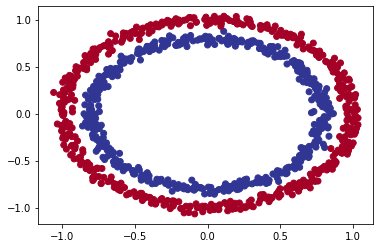

In [37]:
# Visualize with a plot

import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1] ,c = y , cmap=plt.cm.RdYlBu)

#### Input and Output Shapes

In [38]:
# Check the shapes of our Features and labels 
X.shape , y.shape

((1000, 2), (1000,))

In [39]:
# How many Samples we are working with 
len(X), len(y)

(1000, 1000)

#### Steps of Modelling

The Steps in modelling with TensorFlow are typically :

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the Model
5. Tweak 
6. Evaluate ...

In [40]:
# Import TensorFlow 
import tensorflow as tf
print(tf.__version__)

2.5.0


In [41]:
# Set the random set
tf.random.set_seed(42)

#1. Create the Model using the Sequential API
model_1 = tf.keras.Sequential([
          tf.keras.layers.Dense(1)
          ])
#2. Compile the Model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
#3. Fit the Model
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


In [42]:
# lets try and improe our model training for longer
model_1.fit(X,y,epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Our Model is now giving 50% Accuracy, hence its just working as a Random Guesser.

In [43]:
# Set the random set
tf.random.set_seed(42)

#1. Create the Model using the Sequential API
model_2 = tf.keras.Sequential([
          tf.keras.layers.Dense(1),
          tf.keras.layers.Dense(1)
          ])
#2. Compile the Model
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
#3. Fit the Model
model_2.fit(X,y,epochs=100,verbose=0)

In [44]:
# EValuate the Model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

Still giving 50% Accuracy, hence its still a Random Guesser.

#### Improving our Model



In [45]:
# Set the random set
tf.random.set_seed(42)

#1. Create the Model using the Sequential API
model_3 = tf.keras.Sequential([
          tf.keras.layers.Dense(100),
          tf.keras.layers.Dense(10),
          tf.keras.layers.Dense(1)
          ])
#2. Compile the Model
model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#3. Fit the Model
model_3.fit(X,y,epochs=100,verbose=0)

In [46]:
# Evaluate the Model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

In [47]:
y_pred_3=model_3.predict(X)
y_pred_3[:10]

array([[0.48793244],
       [0.55887616],
       [0.56292856],
       [0.5705068 ],
       [0.44141158],
       [0.5738823 ],
       [0.5576486 ],
       [0.48246637],
       [0.47755855],
       [0.5750227 ]], dtype=float32)

#### Visualize the Results

In [48]:
import numpy as np
def plot_decision_boundary(model,X,y):
  """
  Plots the decision boundary created by a mode predicting on X.
  """

  # Define the Axis Boundaries of the plot and create a meshgrid
  x_min , x_max = X[:, 0].min() -0.1 , X[:, 0].max() + 0.1 
  y_min , y_max = X[:, 1].min() -0.1 , X[:, 1].max() + 0.1

  xx , yy = np.meshgrid(np.linspace(x_min, x_max ,100),
                        np.linspace(y_min, y_max ,100))
  
  # Create X Value 
  x_in = np.c_[xx.ravel(),yy.ravel()] # stack 2D Arrays together

  # make Preictions
  y_pred=model.predict(x_in)

  # Check for multi-calss 
  if len(y_pred[0]) >1:
    print('Multicalss Classification')
    # we have to reshape the prediction to get them ready for ploting
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print('Binary Classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  ### plot the decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu, alpha =0.7)
  plt.scatter(X[:,0],X[:,1], c=y, s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max()) 

Binary Classification


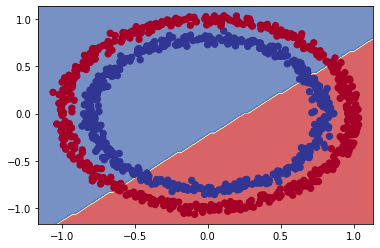

In [49]:
# Check out the predictions made by our model
plot_decision_boundary(model=model_3,
                      X=X,
                      y=y)

#### The Mising Piece is Non-Linearity 

In [51]:
# Set the random set
tf.random.set_seed(42)

#1. Create the Model using the Sequential API
model_4 = tf.keras.Sequential([
          tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
          ])
#2. Compile the Model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#3. Fit the Model
history=model_4.fit(X,y,epochs=100,verbose=0)

In [52]:
model_4.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 3.2448 - accuracy: 0.4560


[3.2447562217712402, 0.4560000002384186]

Binary Classification


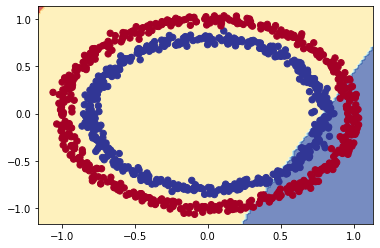

In [53]:
# Check out the predictions made by our model
plot_decision_boundary(model=model_4,
                      X=X,
                      y=y)

In [54]:
# Set the random set
tf.random.set_seed(42)

#1. Create the Model using the Sequential API
model_5 = tf.keras.Sequential([
          tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
          ])
#2. Compile the Model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#3. Fit the Model
history=model_5.fit(X,y,epochs=100,verbose=0)

Binary Classification


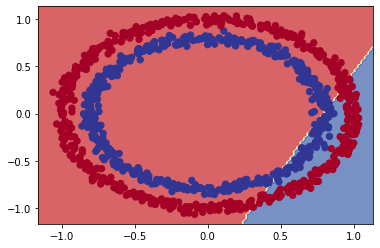

In [55]:
# Check out the predictions made by our model
plot_decision_boundary(model=model_5,
                      X=X,
                      y=y)

In [73]:
# Set the random set
tf.random.set_seed(42)

#1. Create the Model using the Sequential API
model_6 = tf.keras.Sequential([
          tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
          tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
          ])
#2. Compile the Model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
#3. Fit the Model
history=model_6.fit(X,y,epochs=1100,verbose=0)

In [74]:
#4. Evaluate thge Model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0972 - accuracy: 0.9890


[0.09715309739112854, 0.9890000224113464]

In [81]:
model_6.save('model_6.h5')

Binary Classification


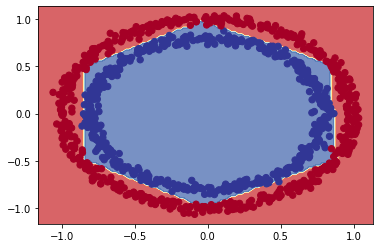

In [75]:
# Check out the predictions made by our model
plot_decision_boundary(model=model_6,
                      X=X,
                      y=y)

In [76]:
# Set the random set
tf.random.set_seed(42)

#1. Create the Model using the Sequential API
model_7 = tf.keras.Sequential([
          tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
          tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
          tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
          ])
#2. Compile the Model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
#3. Fit the Model
history=model_7.fit(X,y,epochs=100,verbose=0)

In [77]:
#4. Evaluate thge Model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

Binary Classification


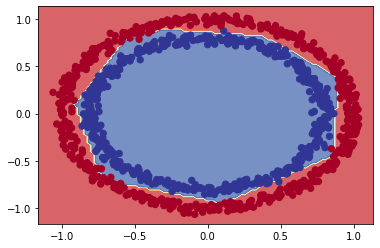

In [79]:
# Check out the predictions made by our model
plot_decision_boundary(model=model_7,
                      X=X,
                      y=y)

**Note** : The Combination of **Linear (Straight Lines) and Non-Linear (Non-Straight Lines) Functions** is one of the key fundamentals of nueral networks.

In [84]:
# Create a toy a tensor (similar  to the data we pass into our models)

A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

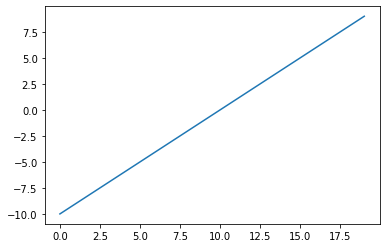

In [85]:
plt.plot(A)

**Sigmoid Function**  : sigmoid(x) = 1/ (1+exp(-x))

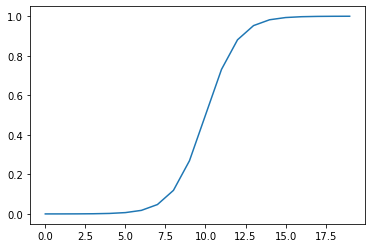

In [93]:
def sigmoid(x):
  return 1/(1+tf.exp(-x))


# Using the sigmoid function toy tensor
plt.plot(sigmoid(A))

**Relu Function**  : relu(x) = max(x,0)

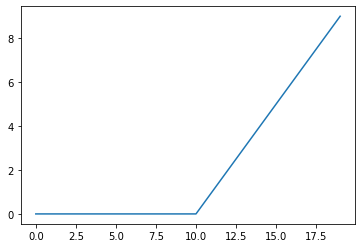

In [94]:
def relu(x):
  return tf.maximum(x,0)

# Using the relu function toy tensor
plt.plot(relu(A))

**Early Stopping**

In [98]:
# Set the random set
tf.random.set_seed(42)

#1. Create the Model using the Sequential API
model_8 = tf.keras.Sequential([
          tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
          tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
          tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
          ])
#2. Compile the Model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# Early Stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

#3. Fit the Model
history=model_8.fit(X,y,epochs=100,verbose=1,callbacks=[callback])

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.6834 - accuracy: 0.5550
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6761 - accuracy: 0.5630
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6700 - accuracy: 0.5600
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6615 - accuracy: 0.5960
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.5850
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6386 - accuracy: 0.6360
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6150 - accuracy: 0.6890
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5641 - accuracy: 0.7480
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5101 - accuracy: 0.8090
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4451 - accuracy: 0.8550
Epoch 11/

In [99]:
#4. Evaluate thge Model
model_8.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0415 - accuracy: 0.9910


[0.04147836193442345, 0.9909999966621399]

Binary Classification


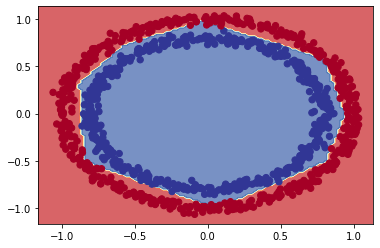

In [100]:
# Check out the predictions made by our model
plot_decision_boundary(model=model_8,
                      X=X,
                      y=y)

#### Split into Training and Test set

In [103]:
len(X)

1000

In [104]:
# Split into training and test
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [106]:
# Set the random set
tf.random.set_seed(42)

#1. Create the Model using the Sequential API
model_9 = tf.keras.Sequential([
          tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
          tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
          tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
          ])
#2. Compile the Model
model_9.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# Early Stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

#3. Fit the Model
history=model_9.fit(X_train,y_train,epochs=100,verbose=0,callbacks=[callback])

In [107]:
model_9.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0535 - accuracy: 0.9800


[0.05353685840964317, 0.9800000190734863]

Binary Classification
Binary Classification


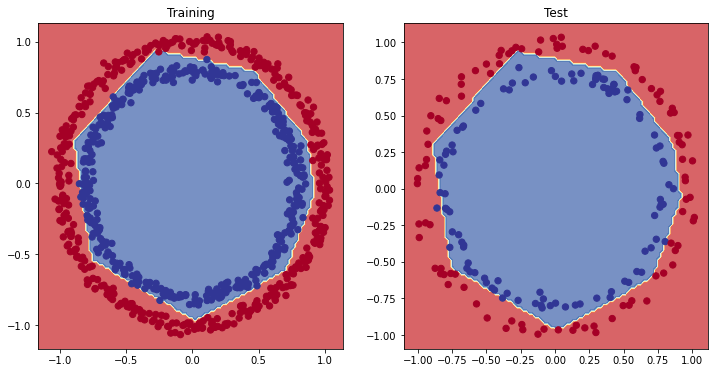

In [110]:
# Check out the predictions made by our model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Training')
plot_decision_boundary(model=model_9,
                      X=X_train,
                      y=y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model=model_9,
                      X=X_test,
                      y=y_test)
plt.show()